# Deep Learning Course: Lab Exercises

In this lab exercise you will:

a) Learn about PyTorch DataLoaders and how to build your own on a custom dataset.

b) Learn how to train and evaluate a convolutional neural network.



#**Q1 DataLoaders**

#Connect your drive account

In order to upload the numpy files of the given folder, you can use the ‘drive’ package from google.colab library like this:

- from google.colab import drive

Then, you define the destination of your Drive account like this:

- drive=drive.mount('/content/drive')

Finally, you can load files from the given folder in this way:

- arr_train_labels=np.load('drive/.._folderdestination_../train_labels.npy')

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive

drive = drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## load train, test and validation label arrays
##here put your custom destination folder
# *****START CODE
train_images = np.load('drive/My Drive/DL_20_21/FIRST_CNN/train_images.npy')
val_images = np.load('drive/My Drive/DL_20_21/FIRST_CNN/val_images.npy')

train_labels = np.load('drive/My Drive/DL_20_21/FIRST_CNN/train_labels.npy')
val_labels = np.load('drive/My Drive/DL_20_21/FIRST_CNN/val_labels.npy')
# *****END CODE

In [3]:
print('train images', train_images.shape)
print('val images', val_images.shape)
print('train labels', train_labels.shape)
print('val labels', val_labels.shape)

train images (5000, 1, 28, 28)
val images (1000, 1, 28, 28)
train labels (5000,)
val labels (1000,)


In [4]:
print(train_images[0])

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  22
    47  72  89  47  47 164 230 176   0   0   0]
  [  0   0   0   0   0   0   0  13  99 116  57  

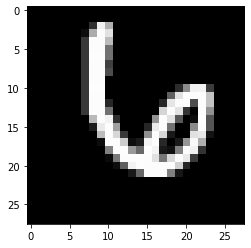

In [6]:
from matplotlib import pyplot as plt

##print a random image
# *****START CODE
plt.imshow(train_images[124][0], cmap='gray')
plt.show()
# *****END CODE

In [7]:
##print the corresponding label
# *****START CODE
print(train_labels[124])
# *****END CODE

6


Iterate through the training images using a for loop and a batchsize of 10

In [8]:
batchsize = 10
# *****START CODE
for i in range(0, len(train_images), batchsize):
    img_batch = train_images[i:i+batchsize]
    lbl_batch = train_labels[i:i+batchsize]
    print(i)
    print('img_batch', img_batch.shape)
    print('lbl_batch', lbl_batch.shape)
# *****END CODE    

0
img_batch (10, 1, 28, 28)
lbl_batch (10,)
10
img_batch (10, 1, 28, 28)
lbl_batch (10,)
20
img_batch (10, 1, 28, 28)
lbl_batch (10,)
30
img_batch (10, 1, 28, 28)
lbl_batch (10,)
40
img_batch (10, 1, 28, 28)
lbl_batch (10,)
50
img_batch (10, 1, 28, 28)
lbl_batch (10,)
60
img_batch (10, 1, 28, 28)
lbl_batch (10,)
70
img_batch (10, 1, 28, 28)
lbl_batch (10,)
80
img_batch (10, 1, 28, 28)
lbl_batch (10,)
90
img_batch (10, 1, 28, 28)
lbl_batch (10,)
100
img_batch (10, 1, 28, 28)
lbl_batch (10,)
110
img_batch (10, 1, 28, 28)
lbl_batch (10,)
120
img_batch (10, 1, 28, 28)
lbl_batch (10,)
130
img_batch (10, 1, 28, 28)
lbl_batch (10,)
140
img_batch (10, 1, 28, 28)
lbl_batch (10,)
150
img_batch (10, 1, 28, 28)
lbl_batch (10,)
160
img_batch (10, 1, 28, 28)
lbl_batch (10,)
170
img_batch (10, 1, 28, 28)
lbl_batch (10,)
180
img_batch (10, 1, 28, 28)
lbl_batch (10,)
190
img_batch (10, 1, 28, 28)
lbl_batch (10,)
200
img_batch (10, 1, 28, 28)
lbl_batch (10,)
210
img_batch (10, 1, 28, 28)
lbl_batch (10,)

#Example: PyTorch DataLoader for MNIST dataset

In [ ]:
import torch
from torchvision import datasets, transforms 

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset2, batch_size=32, shuffle=False)

In [ ]:
for batch_idx, batch in enumerate(train_loader):
        data, target = batch
        print('data', data.shape)
        print('target', target.shape)

data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28]

#Familiarize with .csv files

Create a csv file for the following table:

| Name         | Surname        | Gender | 
| ------------ | ------------ | ------- | 
| Mary         | Smith        | Female       |
| James        | Williams     | Male     | 
| Sarah        | Martin       | Female      | 
| Peter        | Miller       | Male     | 

In [10]:
import pandas as pd

names = ['Mary', 'James', 'Sarah', 'Peter']
surnames = ['Smith', 'Williams', 'Martin', 'Miller']
genders = ['Female', 'Male', 'Female', 'Male']

df = pd.DataFrame({'Name': names ,
                       'Surname': surnames ,
                       'Gender': genders ,
                      })

# *****START CODE
df.to_csv('drive/My Drive/DL_20_21/FIRST_CNN/toy.csv', index=False, columns = ['Name', 'Surname', 'Gender'])
# *****END CODE

In [11]:
toy_file = pd.read_csv('drive/My Drive/DL_20_21/FIRST_CNN/toy.csv')

In [12]:
##show first column
toy_file.iloc[:,0]

0     Mary
1    James
2    Sarah
3    Peter
Name: Name, dtype: object

In [13]:
##show second row
toy_file.iloc[1,:]    

Name          James
Surname    Williams
Gender         Male
Name: 1, dtype: object

In [14]:
##show element in first row and second column
toy_file.iloc[0,1]

'Smith'

#Create your own custom DataLoader

Use the numpy files to define your own custom dataloader.

a) First create and save a .csv file with 2 columns:

- ‘image_ID’, which involves the image index locations
- ‘labels’, which involves the corresponding label for every image index

In [15]:
## write a function that saves the array from create_list in .csv format (fill the blanks)
def save_csv(indexes, labels, destination):
    # *****START CODE
    df = pd.DataFrame({'image_ID': indexes,
                       'label': labels,
                      })
    # *****END CODE
    df.to_csv(destination, index=False, columns=["image_ID", "label"])

In [16]:
train_indexes = list(np.arange(0,5000))
train_labels = list(train_labels)
save_csv(train_indexes, train_labels, 'drive/My Drive/DL_20_21/FIRST_CNN/train.csv')

In [17]:
val_indexes = list(np.arange(0,1000))
val_labels = list(val_labels)
save_csv(val_indexes, val_labels, 'drive/My Drive/DL_20_21/FIRST_CNN/val.csv')

In [18]:
file = pd.read_csv('drive/My Drive/DL_20_21/FIRST_CNN/val.csv')
print(file)

     image_ID  label
0           0      2
1           1      8
2           2      1
3           3      2
4           4      4
..        ...    ...
995       995      5
996       996      6
997       997      9
998       998      4
999       999      3

[1000 rows x 2 columns]


b) Now create your own custom dataloader. When building a custom dataloader, it is necessary to define a class which involves 3 required functions:

- __init__, for the class initialization

- __getitem__, for data extraction according to given indexes

-  __len__, for calculating the total number of data samples

In [19]:
from torch.utils.data.dataset import Dataset

class MyDataset(Dataset):
    def __init__(self, csv_path, images_file):
        ## Read the csv file with pandas library
        # *****START CODE
        self.data_info = pd.read_csv(csv_path)
        # *****END CODE
        ##Load the numpy array of images
        self.images = np.load(images_file)

    def __getitem__(self, index):
        ## Get the image-label set using the given index
        ## Hint: use iloc command from pandas library
        # *****START CODE
        image_id = (self.data_info.iloc[index,0])
        image = self.images[image_id]

        label = int(self.data_info.iloc[index,1])
        # *****END CODE
        ## bring all image spectral values to the range of [0,1]
        image = image/255.0

        return image, label

    def __len__(self):
        ## return the total number of data samples
        return len(self.data_info)

c) Call the dataloader for both the training and the validation sets

In [20]:
from torch.utils.data import DataLoader

## training and validation .csv paths
##here put your custom destination folder
train_csv_file = 'drive/My Drive/DL_20_21/FIRST_CNN/train.csv'
val_csv_file = 'drive/My Drive/DL_20_21/FIRST_CNN/val.csv'

## paths for training and validation numpy array images
##here put your custom destination folder
train_images_file = 'drive/My Drive/DL_20_21/FIRST_CNN/train_images.npy'
val_images_file = 'drive/My Drive/DL_20_21/FIRST_CNN/val_images.npy'

## define and create training and validation dataloaders using MyDataset (fill the blanks)
# *****START CODE
## define and create training and validation dataloaders using MyDataset (fill the blanks)
train_dataset = MyDataset(train_csv_file, train_images_file)
val_dataset = MyDataset(val_csv_file, val_images_file)

train_dataloader = DataLoader( train_dataset, batch_size=32, shuffle=True )
val_dataloader = DataLoader( val_dataset, batch_size=32, shuffle=False )
# *****END CODE

Iterate through your dataloader using a for loop.

In [21]:
from tqdm import tqdm
for i, batch, in enumerate(tqdm(train_dataloader)):
      img_batch, labels = batch
      print('img', img_batch.shape)
      print('labels', labels.shape)

 17%|█▋        | 26/157 [00:00<00:01, 73.92it/s]

img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Siz

 40%|████      | 63/157 [00:00<00:00, 106.31it/s]

img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Siz

 67%|██████▋   | 105/157 [00:00<00:00, 141.77it/s]

img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Siz

100%|██████████| 157/157 [00:00<00:00, 181.66it/s]

img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Size([32])
img torch.Size([32, 1, 28, 28])
labels torch.Siz

#**Q2 Classification problem**

Define your custom convolutional neural network.

In [22]:
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_ch, 32, 3, 1) #W2=(W1−F+2P)/S+1
        ##define a second convolutional layer, which outputs 64 channels
        # *****START CODE
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        # *****END CODE
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        ##create the last two fully connected layers
        # *****START CODE
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, out_ch)
        # *****END CODE

##define the forward propagation of the data
##conv1--relu--conv2--maxpool--dropout1--fc1--dropout2--fc2
    def forward(self, x):
        # *****START CODE
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2) #W2=(W1−F)/S+1
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = x  #F.log_softmax(x, dim=1)
         # *****END CODE       
        return output

In [23]:
# define model
# *****START CODE
model = ConvNet(1,10)
# *****END CODE

In [24]:
import torch
# define optimizer, criterion and number of training epochs
# *****START CODE
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
epochs = 10
# *****END CODE

In [25]:
!pip install torchnet
import torchnet as tnt

# define confusion matrix using tnt package
confusion_matrix = tnt.meter.ConfusionMeter(10)

     |████████████████████████████████| 686kB 6.9MB/s 
     |████████████████████████████████| 204kB 15.8MB/s 
  Created wheel for torchnet: filename=torchnet-0.0.4-cp36-none-any.whl size=29747 sha256=8960aabeb75330f0219593df903cfda1dab5be7032b6b75040feb0e12c840fa2
  Stored in directory: /root/.cache/pip/wheels/e1/03/fb/1c212c2f20905cdf97fe39022946cf16b8e66ed754a6663400
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655251 sha256=5017696a2c89dc1046d8036feac50af7763c52441edcf9ff999393b8311fd268
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5711 sha256=75321fa3f6beb2b3b91c4b8aca61ad1aabe91725adbf195cfe716ab1b332ed6a
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built torchnet visdom torchfile


In [26]:
# create a directory for saving the models and the training progress
save_folder = 'drive/My Drive/DL_20_21/FIRST_CNN/models/'

In [27]:
##function which saves the overall accuracy and average loss at the end of each epoch,
##both for the training and the validation set
def write_results(save_folder, epoch, train_acc, val_acc, train_loss, val_loss):
    ff=open('./{}/progress.txt'.format(save_folder),'a')
    ff.write(' E: ')
    ff.write(str(epoch))
    ff.write('         ')
    ff.write(' TRAIN_OA: ')
    ff.write(str('%.3f' % train_acc))
    ff.write(' VAL_OA: ')
    ff.write(str('%.3f' % val_acc))
    ff.write('         ')
    ff.write(' TRAIN_LOSS: ')
    ff.write(str('%.3f' % train_loss))
    ff.write(' VAL_LOSS: ')
    ff.write(str('%.3f' % val_loss))
    ff.write('\n')

In [28]:
import matplotlib.pyplot as plt
#function that creates the train-val loss graph
#variables 'train_loss' and 'val_loss' are losts containing the average losses for all the epochs
def save_graph(train_loss, val_loss, nb_epochs, save_folder):
    plt.plot(list(range(nb_epochs+1))[1:], train_loss)
    plt.plot(list(range(nb_epochs+1))[1:], val_loss)
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.savefig('{}/chart.png'.format(save_folder))

  2%|▏         | 3/157 [00:00<00:48,  3.21it/s]

Train (epoch 1/10) [0/157 (0%)]	Loss: 2.317788


 66%|██████▌   | 103/157 [00:07<00:03, 13.52it/s]

Train (epoch 1/10) [100/157 (64%)]	Loss: 2.213732


100%|██████████| 32/32 [00:00<00:00, 34.97it/s]


Confusion Matrix:
[[ 88   0   0   0   0   0  12   0   0   0]
 [  0 110   1   0   0   0   2   0   0   0]
 [  3  12  54   0   0   0  27   0   8   0]
 [  3  11   0  48   0   2  13   0  11   2]
 [  0   3   0   0  76   0  14   0   0   0]
 [ 10  15   0   0   2  47  19   0   5   0]
 [  1   5   0   0   2   0 112   0   0   0]
 [  2  21   0   0  14   0   3  50   6   3]
 [  4  14   0   0   1   3  17   0  64   1]
 [  2  11   0   0  26   0   4   0   4  32]]
TRAIN_LOSS:  2.230 TRAIN_ACC:  24.000
VAL_LOSS:  2.029 VAL_ACC:  68.100


  1%|▏         | 2/157 [00:00<00:11, 13.43it/s]

Train (epoch 2/10) [0/157 (0%)]	Loss: 2.005795


 65%|██████▍   | 102/157 [00:07<00:04, 13.56it/s]

Train (epoch 2/10) [100/157 (64%)]	Loss: 0.996695


100%|██████████| 32/32 [00:00<00:00, 35.41it/s]


Confusion Matrix:
[[ 87   0   1   0   1   5   6   0   0   0]
 [  0 108   2   0   0   1   0   0   1   1]
 [  1   0  87   4   1   0   8   0   2   1]
 [  0   4   1  73   0   9   1   0   1   1]
 [  0   0   0   0  91   1   1   0   0   0]
 [  1   3   1   3   6  79   2   0   1   2]
 [  1   2   0   0   5   3 109   0   0   0]
 [  1   4   0   0   3   0   0  83   3   5]
 [  1   3   1  11   5  12   1   0  68   2]
 [  0   1   1   2  11   0   0   2   3  59]]
TRAIN_LOSS:  1.344 TRAIN_ACC:  62.560
VAL_LOSS:  0.597 VAL_ACC:  84.400


  1%|▏         | 2/157 [00:00<00:11, 13.08it/s]

Train (epoch 3/10) [0/157 (0%)]	Loss: 0.783633


 65%|██████▍   | 102/157 [00:07<00:04, 13.50it/s]

Train (epoch 3/10) [100/157 (64%)]	Loss: 0.556465


100%|██████████| 32/32 [00:00<00:00, 36.52it/s]


Confusion Matrix:
[[ 93   0   0   4   1   0   2   0   0   0]
 [  0 112   0   1   0   0   0   0   0   0]
 [  1   2  74  17   0   0   8   2   0   0]
 [  1   3   0  84   0   0   2   0   0   0]
 [  1   0   0   0  90   0   1   0   0   1]
 [  7   5   0  16   5  58   3   0   2   2]
 [  1   3   0   0   4   0 112   0   0   0]
 [  1   3   0   2   1   0   0  91   0   1]
 [  2   8   0  23   5   2   2   2  58   2]
 [  0   2   0   4   3   0   0   5   0  65]]
TRAIN_LOSS:  0.646 TRAIN_ACC:  79.920
VAL_LOSS:  0.481 VAL_ACC:  83.700


  1%|▏         | 2/157 [00:00<00:11, 13.47it/s]

Train (epoch 4/10) [0/157 (0%)]	Loss: 0.300589


 65%|██████▍   | 102/157 [00:07<00:04, 13.36it/s]

Train (epoch 4/10) [100/157 (64%)]	Loss: 0.406716


100%|██████████| 32/32 [00:00<00:00, 36.45it/s]


Confusion Matrix:
[[ 92   0   1   0   1   0   2   1   1   2]
 [  0 108   1   1   0   0   0   0   2   1]
 [  0   0  92   1   2   0   4   2   2   1]
 [  1   1   2  75   0   6   1   2   1   1]
 [  0   0   1   0  91   0   0   0   0   1]
 [  1   0   0   1   5  84   1   1   3   2]
 [  1   1   0   0  10   3 105   0   0   0]
 [  1   2   0   0   1   1   0  84   0  10]
 [  2   3   0   5   5   6   0   1  79   3]
 [  0   0   0   1   4   0   0   1   1  72]]
TRAIN_LOSS:  0.515 TRAIN_ACC:  83.700
VAL_LOSS:  0.350 VAL_ACC:  88.200


  1%|▏         | 2/157 [00:00<00:12, 12.60it/s]

Train (epoch 5/10) [0/157 (0%)]	Loss: 0.306862


 65%|██████▍   | 102/157 [00:07<00:04, 13.45it/s]

Train (epoch 5/10) [100/157 (64%)]	Loss: 0.896705


100%|██████████| 32/32 [00:00<00:00, 36.61it/s]


Confusion Matrix:
[[ 93   0   1   1   1   0   2   2   0   0]
 [  0 109   2   0   0   0   0   0   1   1]
 [  0   0  92   1   0   0   6   2   3   0]
 [  1   3   1  77   0   3   2   1   1   1]
 [  0   0   1   0  83   0   3   0   0   6]
 [  1   1   0   2   1  86   2   1   2   2]
 [  1   1   0   0   1   0 117   0   0   0]
 [  1   2   0   1   1   0   0  91   0   3]
 [  2   2   0   9   1   4   1   0  84   1]
 [  0   0   0   2   2   0   0   2   0  73]]
TRAIN_LOSS:  0.449 TRAIN_ACC:  85.780
VAL_LOSS:  0.295 VAL_ACC:  90.500


  1%|▏         | 2/157 [00:00<00:11, 13.21it/s]

Train (epoch 6/10) [0/157 (0%)]	Loss: 0.350603


 65%|██████▍   | 102/157 [00:07<00:04, 13.34it/s]

Train (epoch 6/10) [100/157 (64%)]	Loss: 0.466760


100%|██████████| 32/32 [00:00<00:00, 35.97it/s]


Confusion Matrix:
[[ 96   0   1   1   1   0   1   0   0   0]
 [  0 109   2   0   0   0   0   0   1   1]
 [  2   0  97   0   0   0   3   1   1   0]
 [  1   0   2  79   0   3   2   1   1   1]
 [  0   0   2   0  88   0   1   0   0   2]
 [  3   1   0   3   3  83   2   0   1   2]
 [  1   1   0   0   1   0 117   0   0   0]
 [  1   1   0   2   1   0   0  88   0   6]
 [  2   2   0   9   1   1   0   0  88   1]
 [  1   0   0   2   1   0   0   1   0  74]]
TRAIN_LOSS:  0.415 TRAIN_ACC:  87.280
VAL_LOSS:  0.280 VAL_ACC:  91.900


  1%|▏         | 2/157 [00:00<00:11, 13.48it/s]

Train (epoch 7/10) [0/157 (0%)]	Loss: 0.226334


 65%|██████▍   | 102/157 [00:09<00:06,  8.23it/s]

Train (epoch 7/10) [100/157 (64%)]	Loss: 0.635509


100%|██████████| 32/32 [00:01<00:00, 23.12it/s]


Confusion Matrix:
[[ 95   0   2   1   0   0   2   0   0   0]
 [  0 110   1   0   0   0   0   0   1   1]
 [  0   0 101   0   0   0   2   0   0   1]
 [  0   1   3  80   0   2   2   1   1   0]
 [  0   0   3   0  83   0   1   0   0   6]
 [  1   1   0   3   1  87   2   0   1   2]
 [  1   1   0   0   1   0 117   0   0   0]
 [  1   2   0   3   1   0   0  87   0   5]
 [  2   3   1   7   1   2   0   0  87   1]
 [  0   0   1   1   0   0   0   2   1  74]]
TRAIN_LOSS:  0.361 TRAIN_ACC:  88.920
VAL_LOSS:  0.266 VAL_ACC:  92.100


  1%|▏         | 2/157 [00:00<00:11, 13.26it/s]

Train (epoch 8/10) [0/157 (0%)]	Loss: 0.385233


 65%|██████▍   | 102/157 [00:07<00:04, 13.44it/s]

Train (epoch 8/10) [100/157 (64%)]	Loss: 0.175251


100%|██████████| 32/32 [00:00<00:00, 35.60it/s]


Confusion Matrix:
[[ 94   0   2   1   0   0   2   1   0   0]
 [  0 109   2   0   0   0   0   0   1   1]
 [  0   0 100   0   0   0   3   1   0   0]
 [  0   0   2  83   0   2   2   1   0   0]
 [  0   0   2   0  87   0   2   0   0   2]
 [  1   0   2   3   1  87   1   0   1   2]
 [  1   1   0   0   0   0 118   0   0   0]
 [  1   2   0   3   1   0   0  88   0   4]
 [  2   3   0   9   1   2   0   0  86   1]
 [  0   0   1   2   1   0   0   0   1  74]]
TRAIN_LOSS:  0.345 TRAIN_ACC:  89.620
VAL_LOSS:  0.251 VAL_ACC:  92.600


  1%|▏         | 2/157 [00:00<00:11, 13.73it/s]

Train (epoch 9/10) [0/157 (0%)]	Loss: 0.211805


 65%|██████▍   | 102/157 [00:07<00:04, 13.42it/s]

Train (epoch 9/10) [100/157 (64%)]	Loss: 0.479806


100%|██████████| 32/32 [00:00<00:00, 36.68it/s]


Confusion Matrix:
[[ 95   0   2   1   0   0   1   1   0   0]
 [  0 110   2   0   0   0   0   0   1   0]
 [  0   0 101   0   0   0   2   1   0   0]
 [  0   1   2  83   0   1   2   1   0   0]
 [  0   0   3   0  86   0   1   0   0   3]
 [  1   0   1   2   1  87   1   2   3   0]
 [  1   1   4   0   0   0 114   0   0   0]
 [  1   0   0   1   1   0   0  96   0   0]
 [  2   2   0   8   1   2   0   1  87   1]
 [  0   0   1   2   2   0   0   5   1  68]]
TRAIN_LOSS:  0.321 TRAIN_ACC:  90.120
VAL_LOSS:  0.247 VAL_ACC:  92.700


  1%|▏         | 2/157 [00:00<00:12, 12.68it/s]

Train (epoch 10/10) [0/157 (0%)]	Loss: 0.303371


 65%|██████▍   | 102/157 [00:07<00:04, 13.19it/s]

Train (epoch 10/10) [100/157 (64%)]	Loss: 0.347652


100%|██████████| 32/32 [00:00<00:00, 36.29it/s]


Confusion Matrix:
[[ 93   0   1   0   1   0   2   3   0   0]
 [  0 110   1   0   0   0   0   0   1   1]
 [  0   0 100   0   0   0   2   1   1   0]
 [  0   1   2  81   0   1   2   1   2   0]
 [  0   0   1   0  90   0   0   1   0   1]
 [  1   0   0   1   1  88   2   2   2   1]
 [  1   1   1   0   1   0 116   0   0   0]
 [  0   0   0   0   1   0   0  97   0   1]
 [  1   2   0   5   2   1   0   1  91   1]
 [  0   0   0   1   1   0   0   6   1  70]]
TRAIN_LOSS:  0.290 TRAIN_ACC:  90.900
VAL_LOSS:  0.228 VAL_ACC:  93.600


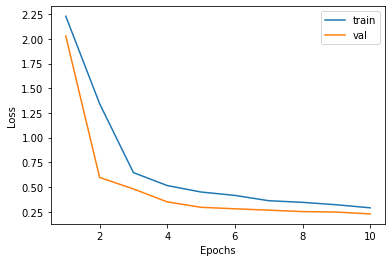

In [29]:
from tqdm import tqdm
import torch.nn.functional as F
total_train_losses = []
total_val_losses = []

#ff=open('./{}/progress.txt'.format(save_folder),'w')

for epoch in range(1,epochs+1):
    ##TRAINING##
    model.train()
    train_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm(train_dataloader)):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        # *****START CODE
        optimizer.zero_grad()
        output = model(img_batch.float())
        loss=criterion(output, lbl_batch.long())
        loss.backward()
        optimizer.step()
        # *****END CODE

        train_losses.append(loss.item())
        confusion_matrix.add(output.data.squeeze(), lbl_batch.long())

        if i % 100 == 0:
            print('Train (epoch {}/{}) [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, epochs, i, len(train_dataloader),100.*i/len(train_dataloader), loss.item()))

    train_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    train_loss_mean = np.mean(train_losses)
    total_train_losses.append(train_loss_mean)
    confusion_matrix.reset()

     ##VALIDATION##
    model.eval()
    val_losses = []

    for i, batch, in enumerate(tqdm(val_dataloader)):
        img_batch, lbl_batch = batch
   
        ##pass the images to the model and calculate the loss
        # *****START CODE
        outputs=model(img_batch.float())
        loss=criterion(outputs, lbl_batch.long())
        # *****END CODE

        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())
        val_losses.append(loss.item())

    print('Confusion Matrix:')
    print(confusion_matrix.conf)

    val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    val_loss_mean = np.mean(val_losses)
    total_val_losses.append(val_loss_mean)

    print('TRAIN_LOSS: ', '%.3f' % train_loss_mean, 'TRAIN_ACC: ', '%.3f' % train_acc)
    print('VAL_LOSS: ', '%.3f' % val_loss_mean, 'VAL_ACC: ', '%.3f' % val_acc)
    confusion_matrix.reset()

    write_results(save_folder, epoch, train_acc, val_acc, train_loss_mean, val_loss_mean)

    torch.save(model.state_dict(), save_folder + 'model_{}.pt'.format(epoch))

save_graph(total_train_losses, total_val_losses, epochs, save_folder)



Test the trained model.

In [30]:
test_images_file = 'drive/My Drive/DL_20_21/FIRST_CNN/test_images.npy'
test_labels_file = 'drive/My Drive/DL_20_21/FIRST_CNN/test_labels.npy'

##load the test images and the test labels
# *****START CODE
images = np.load(test_images_file)
labels = np.load(test_labels_file)
# *****END CODE

##define the model, load it and put it in evaluation mode
# *****START CODE
model = ConvNet(1,10)
model.load_state_dict(torch.load('drive/My Drive/DL_20_21/FIRST_CNN/models/model_10.pt'))
model.eval()
# *****END CODE

confusion_matrix = tnt.meter.ConfusionMeter(10) 
confusion_matrix.reset()


for i in range(0, len(images)):
    ##rad each image, normalize it, convert it to a pytorch tensor of type float
    # *****START CODE
    img = images[i]
    label = torch.tensor([labels[i]])
    img = img/255.0 #normalization
    img = np.expand_dims(img,0)#reshape to (batchsize x channels x height x width)
    img = torch.from_numpy(img)
    # *****END CODE

    ##produce the model prediction
    # *****START CODE
    output = F.log_softmax(model(img.float()),1)
    # *****END CODE

    confusion_matrix.add(output.data, label.long())

print(confusion_matrix.conf)

[[ 98   0   0   0   0   0   1   0   1   0]
 [  0 107   2   0   0   2   0   0   1   0]
 [  1   0  84   1   3   0   1   1   3   0]
 [  1   1   2  81   0   0   1   3   4   2]
 [  0   0   0   0  78   0   1   0   0   4]
 [  1   0   1   0   0  76   1   1   3   2]
 [  1   0   0   0   0   1 113   0   0   0]
 [  0   0   0   0   2   0   0 107   0   2]
 [  1   0   0   1   0   0   1   0 103   3]
 [  0   0   0   3   3   0   0   7   0  83]]


Plot the first six testing images along with their true labels.

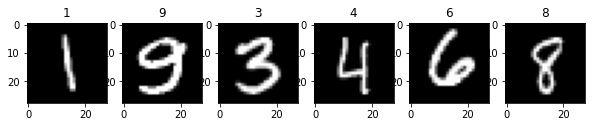

In [31]:
##plot the testing images
# *****START CODE
plt.figure(figsize=(10,6))
n_images = 6
for i in range(n_images):
  plt.subplot(1, n_images, i+1)
  one_image = images[i, 0, :, :]
  one_title = labels[i]
  plt.imshow(one_image,cmap='gray')
  plt.title(one_title);
 # *****END CODE 

Print the model's predicted labels for the above images.

In [32]:
##print the predicted labels for the above images
# *****START CODE
for i in range(n_images):
    img = images[i]
    img = img/255.0 #normalization
    img = np.expand_dims(img,0)#reshape to (batchsize x channels x height x width)
    img = torch.from_numpy(img)
    output = F.log_softmax(model(img.float()),1)
    output = torch.argmax(output)
    print(output)
# *****END CODE

tensor(1)
tensor(3)
tensor(3)
tensor(4)
tensor(6)
tensor(8)
